In [1]:
#importing lib
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#importing dataset 
data_path = "dataset"
num_classes = 2
num_samples = 1200
row_orig = 100
col_orig = 100

In [3]:
# method to load image data into numpy array
def load_data():
    labels = os.listdir(data_path)
    print(labels[:])
    num_labels = len(labels)
    
    X = np.ndarray((num_samples,(row_orig*col_orig*3)),dtype=np.uint8)
    y = np.zeros((num_samples,),dtype=np.uint8)
    i=0
    j=0
    for label in labels:
        imgs_name_data = os.listdir(os.path.join(data_path,label))
        total_imgs = len(imgs_name_data)
        print(label,total_imgs)
        count=0
        for img_name in imgs_name_data:
            img = cv2.imread(os.path.join(data_path,label,img_name),cv2.IMREAD_COLOR)
            img = cv2.resize(img,(100,100))
            img = np.array([img])
            img = np.reshape(img,((row_orig*col_orig*3),))
            X[i] = img
            y[i] = j
            i = i + 1
            count = count + 1
            if(i%100==0):
                print("{0}/{1} images loaded".format(count,total_imgs))
        j = j + 1
    print("All images are loaded")
    np.save("data.npy",X,y)
    return X,y

# calling the method to load data in the form of numpy array
X,y = load_data()

# shape of loaded data
print("X : {}".format(X.shape)) # O/P  : X : (1200, 30000)
print("y : {}".format(y.shape)) # O/P  : y : (1200,) 

['Parasitized', 'Uninfected']
Parasitized 600
100/600 images loaded
200/600 images loaded
300/600 images loaded
400/600 images loaded
500/600 images loaded
600/600 images loaded
Uninfected 600
100/600 images loaded
200/600 images loaded
300/600 images loaded
400/600 images loaded
500/600 images loaded
600/600 images loaded
All images are loaded
X : (1200, 30000)
y : (1200,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.80,test_size=0.20,shuffle=True,random_state=42)
print("X_train : {}".format(X_train.shape))
print("y_train : {}".format(y_train.shape))
print("X_test : {}".format(X_test.shape))
print("y_test : {}".format(y_test.shape))

X_train : (960, 30000)
y_train : (960,)
X_test : (240, 30000)
y_test : (240,)


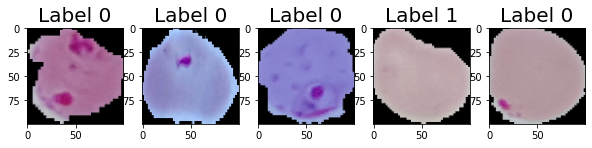

In [5]:
# showing first 5 images
plt.figure(figsize=(10,4))
for index,(image,label) in enumerate(zip(X_train[0:5],y_train[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(100,100,3)))
    plt.title('Label %d'%label,fontsize=20)
    plt.plot()

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

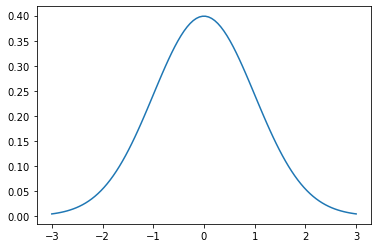

In [7]:
# importing stats to finding z-score 
from scipy import stats
from scipy.stats import norm
import math

X = stats.zscore(X_train,axis=1)

# Fit a normal distribution to the data:
mu, variance = norm.fit(X)

# Plot the PDF.
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()



---


### Random Forest

In [8]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [9]:
pred = rf.predict(X_test)
pred

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0],
      dtype=uint8)

In [10]:
#Randomforest accuracy
print(f'Train Accuracy:- {rf.score(X_train,y_train):.3f}')
print(f'Test Accuracy:- {rf.score(X_test,y_test):.3f}')

Train Accuracy:- 1.000
Test Accuracy:- 0.900


Vanilla Random Forest


<AxesSubplot:>

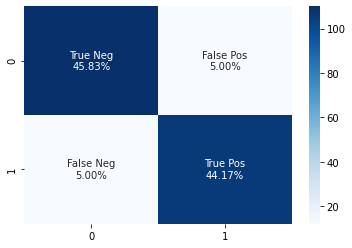

In [69]:
#Confusion Matrix Vanilla Random Forest
rfc = confusion_matrix(y_test,pred)
print("Vanilla Random Forest")
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in
                     rfc.flatten()/np.sum(rfc)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(rfc, annot=labels, fmt='', cmap='Blues')

In [12]:
#Classification Report
target_names = ['class 0(Parasitized)', 'class 1(Uninfected)']
print(classification_report(y_test, pred, target_names=target_names))

                      precision    recall  f1-score   support

class 0(Parasitized)       0.90      0.90      0.90       122
 class 1(Uninfected)       0.90      0.90      0.90       118

            accuracy                           0.90       240
           macro avg       0.90      0.90      0.90       240
        weighted avg       0.90      0.90      0.90       240



### Random Forest with Hyper Parameters

In [13]:
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 150, num = 10)]
#Number of features to consider at every split
max_features = ['auto','sqrt']
#Maximum number of levels in tree
max_depth = [2,4]
#Minimum no of sample required to split a node
min_samples_split = [2,5]
#Minimum number of samples rewuired at each leaf node
min_samples_leaf = [1,2]
#Meathod of selecting samples for training each tree
bootstrap = [True,False]

In [14]:
#Create a parameter grid
param_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}
print(param_grid)

{'n_estimators': [10, 25, 41, 56, 72, 87, 103, 118, 134, 150], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [15]:
from sklearn.model_selection import GridSearchCV
rf_grid = GridSearchCV(estimator= rf, param_grid= param_grid, cv=5, verbose=2, n_jobs=4)

In [16]:
brfm = rf_grid.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits


In [17]:
#best parameters for model
rf_grid.best_params_

{'bootstrap': True,
 'max_depth': 4,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 56}

In [18]:
#Random Forest after hypertuning
print(f'Train Accuracy:- {rf_grid.score(X_train,y_train):.3f}')
print(f'Test Accuracy:- {rf_grid.score(X_test,y_test):.3f}')

Train Accuracy:- 0.887
Test Accuracy:- 0.821


Hyper Parameter Random Forest


<AxesSubplot:>

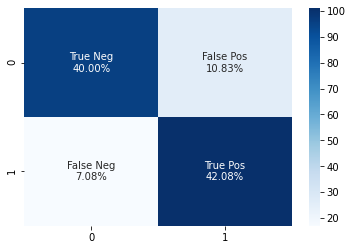

In [67]:
#Confusion Matrix
hrf = confusion_matrix(y_test,brfm.predict(X_test))
print("Hyper Parameter Random Forest")
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in
                     hrf.flatten()/np.sum(hrf)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(hrf, annot=labels, fmt='', cmap='Blues')

In [20]:
xpred = brfm.predict(X_test)

In [21]:
#Classification Report
target_names = ['class 0(Parasitized)', 'class 1(Uninfected)']
print(classification_report(y_test, xpred, target_names=target_names))

                      precision    recall  f1-score   support

class 0(Parasitized)       0.85      0.79      0.82       122
 class 1(Uninfected)       0.80      0.86      0.82       118

            accuracy                           0.82       240
           macro avg       0.82      0.82      0.82       240
        weighted avg       0.82      0.82      0.82       240



In [22]:
#total no of decision trees in random forest
len(brfm.best_estimator_)

56

In [23]:
#printing info about 100 
brfm.best_estimator_

RandomForestClassifier(max_depth=4, max_features='sqrt', n_estimators=56)

[Text(3661.875, 4892.4, 'X[18760] <= -0.791\ngini = 0.499\nsamples = 606\nvalue = [454, 506]'),
 Text(1743.75, 3805.2, 'X[29872] <= 1.384\ngini = 0.137\nsamples = 108\nvalue = [163, 13]'),
 Text(1046.25, 2718.0, 'X[10161] <= 0.73\ngini = 0.059\nsamples = 103\nvalue = [160, 5]'),
 Text(697.5, 1630.7999999999997, 'X[729] <= 1.123\ngini = 0.036\nsamples = 102\nvalue = [160, 3]'),
 Text(348.75, 543.5999999999995, 'gini = 0.012\nsamples = 100\nvalue = [160, 1]'),
 Text(1046.25, 543.5999999999995, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(1395.0, 1630.7999999999997, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(2441.25, 2718.0, 'X[10355] <= -1.362\ngini = 0.397\nsamples = 5\nvalue = [3, 8]'),
 Text(2092.5, 1630.7999999999997, 'gini = 0.0\nsamples = 3\nvalue = [0, 8]'),
 Text(2790.0, 1630.7999999999997, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]'),
 Text(5580.0, 3805.2, 'X[15461] <= -0.564\ngini = 0.467\nsamples = 498\nvalue = [291, 493]'),
 Text(4185.0, 2718.0, 'X[13686] <= 0.833\n

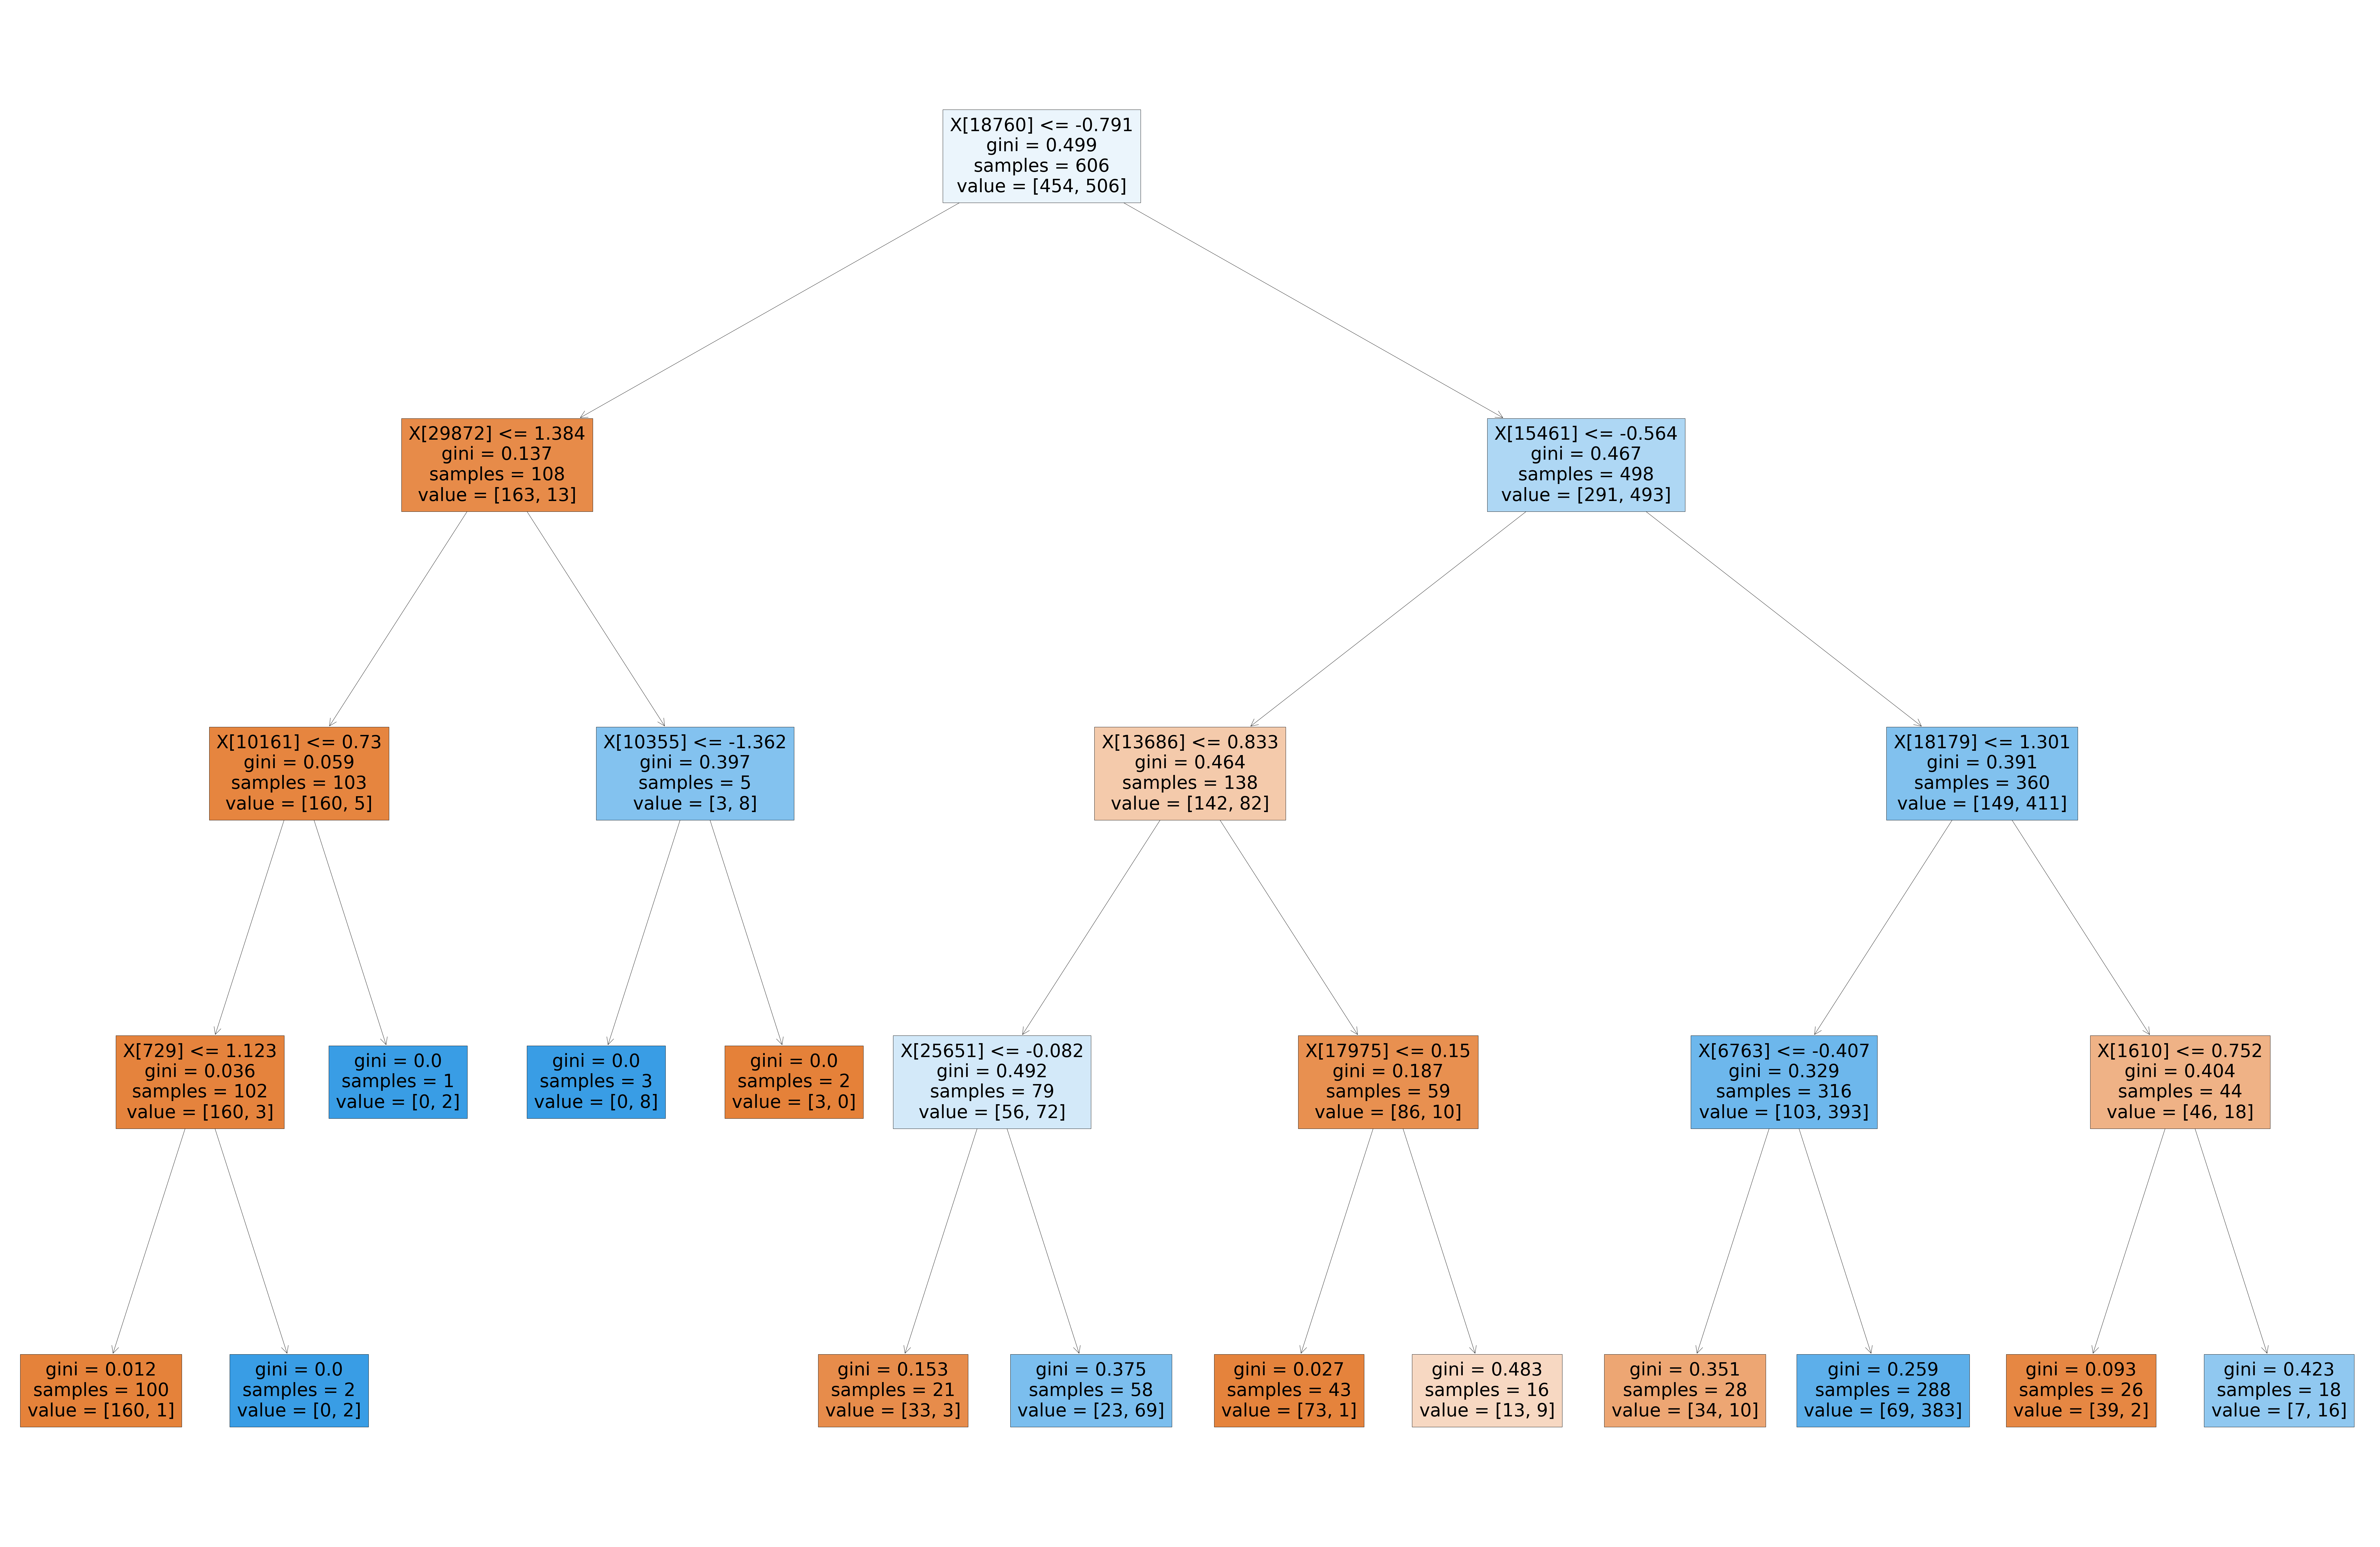

In [24]:
#Plotting one decision tree
plt.figure(figsize=(150,100))
tree.plot_tree(brfm.best_estimator_[1],filled=True)

[Text(3251.963619402985, 5322.75, 'X[12370] <= -0.433\ngini = 0.5\nsamples = 605\nvalue = [477, 483]'),
 Text(1374.1791044776119, 5096.25, 'X[22153] <= 0.163\ngini = 0.217\nsamples = 164\nvalue = [234, 33]'),
 Text(874.4776119402985, 4869.75, 'X[124] <= 1.357\ngini = 0.069\nsamples = 120\nvalue = [190, 7]'),
 Text(624.6268656716418, 4643.25, 'X[26311] <= 0.771\ngini = 0.041\nsamples = 115\nvalue = [187, 4]'),
 Text(499.7014925373134, 4416.75, 'X[10949] <= 1.364\ngini = 0.031\nsamples = 114\nvalue = [187, 3]'),
 Text(249.8507462686567, 4190.25, 'X[27500] <= 0.951\ngini = 0.011\nsamples = 107\nvalue = [178, 1]'),
 Text(124.92537313432835, 3963.75, 'gini = 0.0\nsamples = 105\nvalue = [176, 0]'),
 Text(374.77611940298505, 3963.75, 'X[10157] <= 0.723\ngini = 0.444\nsamples = 2\nvalue = [2, 1]'),
 Text(249.8507462686567, 3737.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(499.7014925373134, 3737.25, 'gini = 0.0\nsamples = 1\nvalue = [2, 0]'),
 Text(749.5522388059701, 4190.25, 'X[2607]

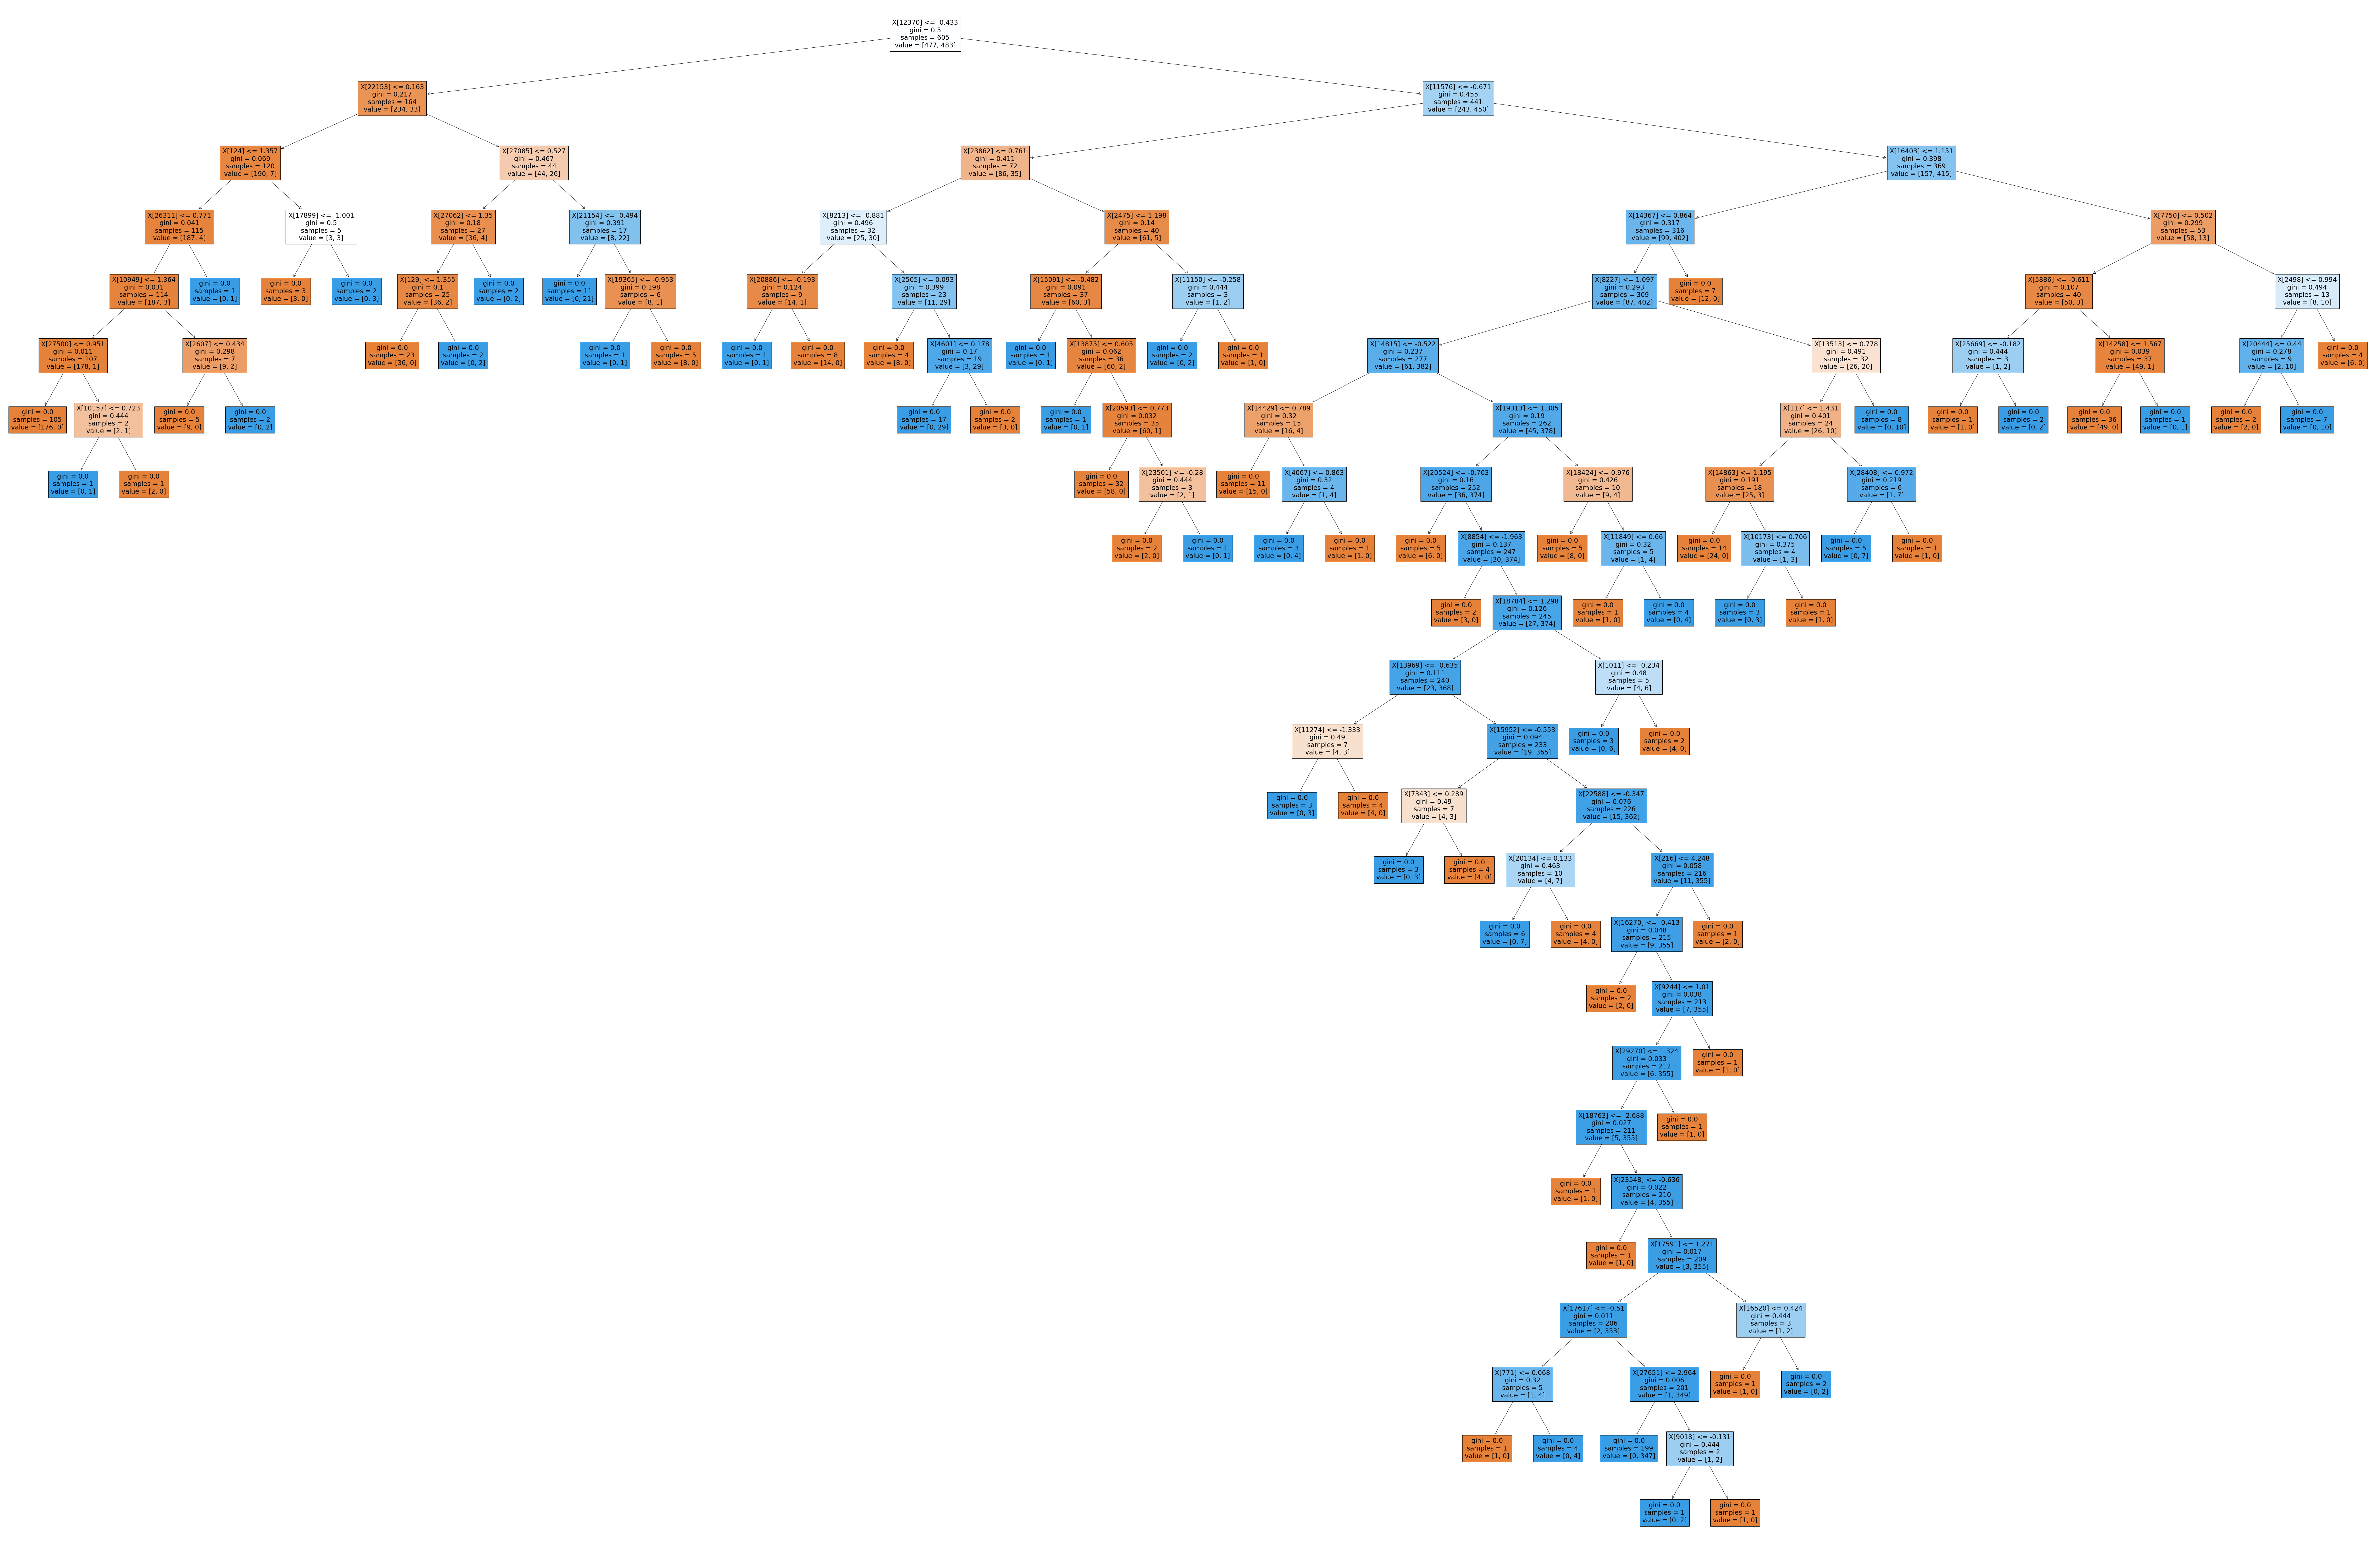

In [25]:
#Plotting one decision tree
plt.figure(figsize=(150,100))
tree.plot_tree(rf.estimators_[1],filled=True)

### Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [27]:
y_pred = nb.predict(X_test)
print(y_pred)

[0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0
 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0
 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1
 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 0 1 0 0 1 1 1 1 1 0 0 1 1 1 1]


In [28]:
print(f'Train Accuracy:- {nb.score(X_train,y_train):.3f}')
print(f'Test Accuracy:- {nb.score(X_test,y_test):.3f}')

Train Accuracy:- 0.651
Test Accuracy:- 0.704


Naive Bayes


<AxesSubplot:>

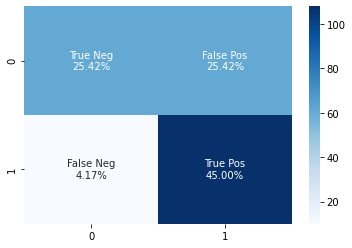

In [70]:
#Confusion Matrix
nbc = confusion_matrix(y_test,y_pred)
print("Naive Bayes")
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in
                     nbc.flatten()/np.sum(nbc)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(nbc, annot=labels, fmt='', cmap='Blues')

In [30]:
#Classification Report
target_names = ['class 0(Parasitized)', 'class 1(Uninfected)']
print(classification_report(y_test, y_pred, target_names=target_names))

                      precision    recall  f1-score   support

class 0(Parasitized)       0.86      0.50      0.63       122
 class 1(Uninfected)       0.64      0.92      0.75       118

            accuracy                           0.70       240
           macro avg       0.75      0.71      0.69       240
        weighted avg       0.75      0.70      0.69       240



### Logistic Regression 

In [31]:
# creating the logistic regression object
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000)

In [32]:
# training the model and performing the prediction on test set
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
lr_pred.shape

(240,)

In [33]:
# printing the accuracy of model on test set
print("Train : {}".format(lr.score(X_train,y_train)))
print("Test : {}".format(lr.score(X_test,y_test)))

Train : 1.0
Test : 0.7583333333333333


Logistic Regression


<AxesSubplot:>

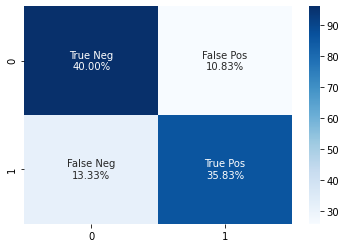

In [76]:
#Confusion Matrix
lrc = confusion_matrix(y_test,lr_pred)
print('Logistic Regression')
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in
                     lrc.flatten()/np.sum(lrc)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lrc, annot=labels, fmt='', cmap='Blues')

In [35]:
#Classification Report
target_names = ['class 0(Parasitized)', 'class 1(Uninfected)']
print(classification_report(y_test, lr_pred, target_names=target_names))

                      precision    recall  f1-score   support

class 0(Parasitized)       0.75      0.79      0.77       122
 class 1(Uninfected)       0.77      0.73      0.75       118

            accuracy                           0.76       240
           macro avg       0.76      0.76      0.76       240
        weighted avg       0.76      0.76      0.76       240



### SVM

In [36]:
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix

def report(model, X_train, X_test, y_train, y_test, name):
    model.fit(X_train, y_train)
    accuracy     = model.score(X_test, y_test)
    y_pred = model.predict(X_test)

    df_model = pd.DataFrame({'Model'        : [name],
                             'Accuracy'     : [accuracy],
                            })  
    return df_model

svc = SVC(kernel='rbf', probability=True)
linearsvc = LinearSVC()
polysvc = SVC(kernel='poly')
df_models = pd.concat([report(linearsvc, X_train, X_test, y_train, y_test, 'LinearSVC'),
                       report(polysvc, X_train, X_test, y_train, y_test, 'PolyKernelSVC'),
                       report(svc, X_train, X_test, y_train, y_test, 'RBFSVC')
                       ], axis=0).reset_index()
df_models = df_models.drop('index', axis=1)
print('Performance of All models: \n',df_models.loc[:,['Model','Accuracy']])

Performance of All models: 
            Model  Accuracy
0      LinearSVC  0.754167
1  PolyKernelSVC  0.779167
2         RBFSVC  0.858333


In [37]:
svmpred = svc.predict(X_test)

In [38]:
print(svmpred)

[0 1 1 0 0 0 0 1 0 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0
 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0
 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0]


In [39]:
# printing the accuracy of model on test set
print("Train : {}".format(svc.score(X_train,y_train)))
print("Test : {}".format(svc.score(X_test,y_test)))

Train : 0.9270833333333334
Test : 0.8583333333333333


SVM


<AxesSubplot:>

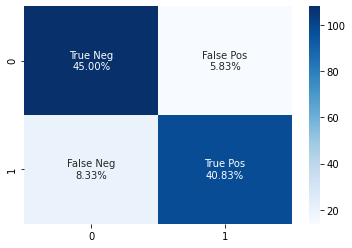

In [71]:
#Confusion Matrix
svmc = confusion_matrix(y_test,svmpred)
print("SVM")
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in
                     svmc.flatten()/np.sum(svmc)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(svmc, annot=labels, fmt='', cmap='Blues')

In [41]:
#Classification Report
target_names = ['class 0(Parasitized)', 'class 1(Uninfected)']
print(classification_report(y_test, svmpred, target_names=target_names))

                      precision    recall  f1-score   support

class 0(Parasitized)       0.84      0.89      0.86       122
 class 1(Uninfected)       0.88      0.83      0.85       118

            accuracy                           0.86       240
           macro avg       0.86      0.86      0.86       240
        weighted avg       0.86      0.86      0.86       240



###  MaxVote Ensemble

In [42]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators=[('rf', rf), ('nb', nb), ('svm', svc)], voting='hard')
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8708333333333333

In [43]:
# printing the accuracy of model on test set
print("Train : {}".format(model.score(X_train,y_train)))
print("Test : {}".format(model.score(X_test,y_test)))

Train : 0.940625
Test : 0.8708333333333333


In [44]:
enpred = model.predict(X_test)

In [45]:
print(enpred)

[0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1 1 0 0 0
 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0
 1 1 1 1 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1
 0 1 1 0 1 0 1 0 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0
 1 0 1 0 0 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1
 1 1 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0]


MaxVote Ensemble


<AxesSubplot:>

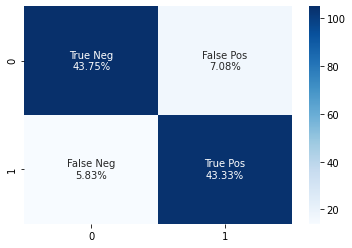

In [73]:
encf = confusion_matrix(y_test,enpred)
print("MaxVote Ensemble")
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in
                     encf.flatten()/np.sum(encf)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(encf, annot=labels, fmt='', cmap='Blues')

In [47]:
#Classification Report
target_names = ['class 0(Parasitized)', 'class 1(Uninfected)']
print(classification_report(y_test, enpred, target_names=target_names))

                      precision    recall  f1-score   support

class 0(Parasitized)       0.88      0.86      0.87       122
 class 1(Uninfected)       0.86      0.88      0.87       118

            accuracy                           0.87       240
           macro avg       0.87      0.87      0.87       240
        weighted avg       0.87      0.87      0.87       240



### Averaging Ensemble

In [48]:
pred1 = rf.predict_proba(X_test)
pred2 = nb.predict_proba(X_test)
pred3 = svc.predict_proba(X_test)

finalpred = (pred1+pred2+pred3)/3

In [49]:
print(finalpred)

[[0.7107389  0.2892611 ]
 [0.1952064  0.8047936 ]
 [0.23516712 0.76483288]
 [0.5092976  0.4907024 ]
 [0.9693094  0.0306906 ]
 [0.36472351 0.63527649]
 [0.61115452 0.38884548]
 [0.05143682 0.94856318]
 [0.29886699 0.70113301]
 [0.18652863 0.81347137]
 [0.09106004 0.90893996]
 [0.54920169 0.45079831]
 [0.57901543 0.42098457]
 [0.10831699 0.89168301]
 [0.18119081 0.81880919]
 [0.77770734 0.22229266]
 [0.30485883 0.69514117]
 [0.14410788 0.85589212]
 [0.03635444 0.96364556]
 [0.92490773 0.07509227]
 [0.84471993 0.15528007]
 [0.07797431 0.92202569]
 [0.13408612 0.86591388]
 [0.97237987 0.02762013]
 [0.43992604 0.56007396]
 [0.92860316 0.07139684]
 [0.16279672 0.83720328]
 [0.50509942 0.49490058]
 [0.58933108 0.41066892]
 [0.84709228 0.15290772]
 [0.95037487 0.04962513]
 [0.22792279 0.77207721]
 [0.05854259 0.94145741]
 [0.07001936 0.92998064]
 [0.49867184 0.50132816]
 [0.86391396 0.13608604]
 [0.94749788 0.05250212]
 [0.6211629  0.3788371 ]
 [0.97148133 0.02851867]
 [0.0237071  0.9762929 ]


In [50]:
print(finalpred[:,0])
finalpred = finalpred[:,0]

[0.7107389  0.1952064  0.23516712 0.5092976  0.9693094  0.36472351
 0.61115452 0.05143682 0.29886699 0.18652863 0.09106004 0.54920169
 0.57901543 0.10831699 0.18119081 0.77770734 0.30485883 0.14410788
 0.03635444 0.92490773 0.84471993 0.07797431 0.13408612 0.97237987
 0.43992604 0.92860316 0.16279672 0.50509942 0.58933108 0.84709228
 0.95037487 0.22792279 0.05854259 0.07001936 0.49867184 0.86391396
 0.94749788 0.6211629  0.97148133 0.0237071  0.15532055 0.13664832
 0.04053312 0.55155613 0.94677886 0.94607994 0.93290623 0.57571623
 0.94063846 0.53802871 0.14008065 0.4805379  0.9517517  0.35845967
 0.20642456 0.60013059 0.02789286 0.82820231 0.13427792 0.78280257
 0.93480404 0.59601411 0.51732011 0.97083281 0.79978825 0.07618737
 0.50401341 0.94202219 0.85077839 0.85169444 0.51597316 0.90816747
 0.30234004 0.89247333 0.56606765 0.9242172  0.49187141 0.90521842
 0.13735978 0.39305961 0.38398593 0.37138786 0.19311354 0.75870573
 0.21506718 0.00641494 0.15734007 0.47905357 0.0297214  0.3556

In [51]:
for i in range (0,len(finalpred)):
    if(finalpred[i]>=0.5):
        finalpred[i] = 0
    else:
        finalpred[i] = 1
        
finalpred = finalpred.astype("int32")
print(finalpred)        

[0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0
 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 0 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 1 0
 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 1
 0 1 1 0 1 0 1 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0
 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1
 1 1 1 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1]


In [52]:
s = y_test
count = 0
for i in range(len(finalpred)):
  if finalpred[i]==s[i]:
    count = count+1
print(count)
len(finalpred)
accuracy = count/len(finalpred)
accuracy

200


0.8333333333333334

Averaging Ensemble


<AxesSubplot:>

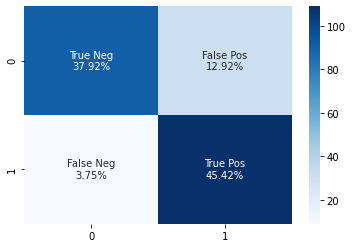

In [74]:
#Confusion Matrix

enc = confusion_matrix(y_test,finalpred)
print("Averaging Ensemble")
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_percentages = ["{0:.2%}".format(value) for value in
                     enc.flatten()/np.sum(enc)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(enc, annot=labels, fmt='', cmap='Blues')

In [54]:
#Classification Report
target_names = ['class 0(Parasitized)', 'class 1(Uninfected)']
print(classification_report(y_test, finalpred, target_names=target_names))

                      precision    recall  f1-score   support

class 0(Parasitized)       0.91      0.75      0.82       122
 class 1(Uninfected)       0.78      0.92      0.84       118

            accuracy                           0.83       240
           macro avg       0.84      0.83      0.83       240
        weighted avg       0.85      0.83      0.83       240



In [62]:
index = ['Random Forest','Hyper Parameter Random Forest','Naive Bayes','SVM','Logistic Regression','Ensemble']
data = [[rf.score(X_train,y_train) , rf.score(X_test,y_test)], [ rf_grid.score(X_train,y_train) , rf_grid.score(X_test,y_test)],[nb.score(X_train,y_train) , nb.score(X_test,y_test)], [svc.score(X_train,y_train) , svc.score(X_test,y_test)], [lr.score(X_train,y_train) , lr.score(X_test,y_test)],[model.score(X_train,y_train) , model.score(X_test,y_test)]]
accuracy_table = pd.DataFrame(data, columns = ['Train Accuracy' , 'Test Accuracy'], index = index)
accuracy_table

,Train Accuracy,Test Accuracy
Random Forest,1.000000,0.900000
Hyper Parameter Random Forest,0.887500,0.820833
Naive Bayes,0.651042,0.704167
SVM,0.927083,0.858333
Logistic Regression,1.000000,0.758333
Ensemble,0.940625,0.870833


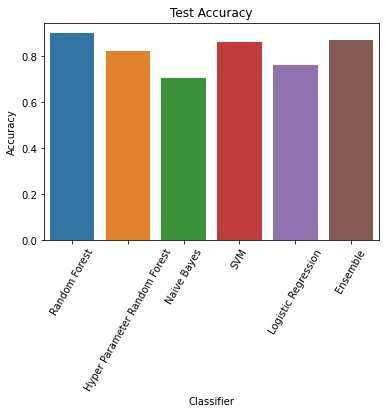

In [75]:
axis = sns.barplot(x = index, y = accuracy_table['Test Accuracy'])
plt.title('Test Accuracy')
axis.set(xlabel='Classifier', ylabel='Accuracy')
for item in axis.get_xticklabels():
    item.set_rotation(60)

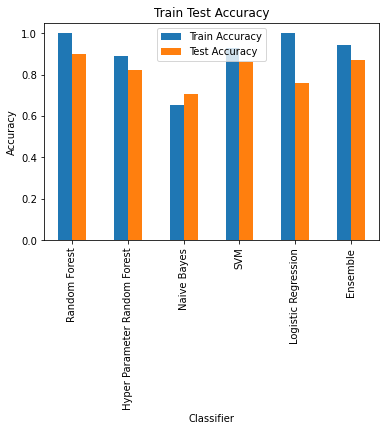

In [65]:
accuracy_table.plot.bar() 
plt.title('Train Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Classifier')
plt.show()